<a href="https://colab.research.google.com/github/liubruce11/BA820-TeamB7/blob/main/M1.1_PetCatsUK_Primary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BA820 Project Proposal EDA**
**Pet Cats UK**

Team B7: Allen Chiu, Bruce Liu, Erica Kim, Emily Su

>[BA820 Project Proposal EDA](#scrollTo=dydyuRGSOYUa)

>>[Objective:](#scrollTo=YcF2WNA0eQBN)

>[1. Data Overview](#scrollTo=SuBwGFKbfYwp)

>[2. EDA](#scrollTo=jHujIqAvqtEC)

>>>[2.1 Question: Do cats exhibit distinct styles of spatial movement, such as highly localized routines versus exploratory roaming, and how sharply separated are these behaviors across individuals?](#scrollTo=Pnk570Xiqvw8)

>>>[2.2 Question: Among cats with similar indoor constraints, are movement behaviors similar, or do they demonstrate similar spatial usage patterns?](#scrollTo=J7qjxUDJq_jI)

>>>[2.3 Question: What representations of a cat’s movement history best preserve meaningful behavioral differences while remaining robust to noise and uneven observation counts?](#scrollTo=0vThnnKZr5Vn)

>>>[2.4 Question: How much of the observed variation in movement behavior is driven by true behavioral differences versus differences in tracking density across cats?](#scrollTo=vq62UcYhqWUk)

>>>[2.5 Question: Which cats have extreme prey-catching behavior(outliers) and how do these cases correlate with specific environmental or behavioral factors?](#scrollTo=tUPXmG0PvuDi)



## **Objective:**  
This notebook performs preliminary exploratory data analysis to understand the structure, variability, and limitations of the Pet Cats UK dataset. The goal is to surface unobvious patterns and sources of heterogeneity that motivate insightful domain questions for unsupervised machine learning.

# **1. Data Overview**

The analysis uses two linked tables:
- `cats_uk.csv`: high-frequency GPS movement observations
- `cats_uk_reference.csv`: cat-level biological and household attributes

Each movement observation is associated with a single cat via `tag_id`, enabling analysis at both the event and individual levels.


In [ ]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pulls dataset
url1 = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk.csv"

cats_uk = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk_reference.csv"

cats_uk_ref = pd.read_csv(url2)

In [ ]:
cats_uk.head()

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,Pet Cats United Kingdom
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,Pet Cats United Kingdom
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,Pet Cats United Kingdom
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,Pet Cats United Kingdom
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,Pet Cats United Kingdom


In [ ]:
cats_uk_ref.head()

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [ ]:
cats_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tag_id                    18215 non-null  object 
 1   event_id                  18215 non-null  int64  
 2   visible                   18215 non-null  bool   
 3   timestamp                 18215 non-null  object 
 4   location_long             18215 non-null  float64
 5   location_lat              18215 non-null  float64
 6   ground_speed              18215 non-null  int64  
 7   height_above_ellipsoid    18215 non-null  float64
 8   algorithm_marked_outlier  18215 non-null  bool   
 9   manually_marked_outlier   18215 non-null  bool   
 10  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
cats_uk_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         101 non-null    object 
 1   animal_id                      101 non-null    object 
 2   animal_taxon                   101 non-null    object 
 3   deploy_on_date                 101 non-null    object 
 4   deploy_off_date                101 non-null    object 
 5   hunt                           92 non-null     object 
 6   prey_p_month                   101 non-null    float64
 7   animal_reproductive_condition  98 non-null     object 
 8   animal_sex                     101 non-null    object 
 9   hrs_indoors                    101 non-null    float64
 10  n_cats                         101 non-null    int64  
 11  food_dry                       101 non-null    bool   
 12  food_wet                       101 non-null    boo

In [ ]:
cats_uk.isnull().sum().sort_values(ascending=False)

,0
tag_id,0
event_id,0
visible,0
timestamp,0
location_long,0
location_lat,0
ground_speed,0
height_above_ellipsoid,0
algorithm_marked_outlier,0
manually_marked_outlier,0


In [ ]:
cats_uk_ref.isnull().sum().sort_values(ascending=False)

,0
food_other,10
hunt,9
animal_reproductive_condition,3
age_years,1
deploy_on_date,0
animal_taxon,0
tag_id,0
animal_id,0
prey_p_month,0
deploy_off_date,0


Missing data for hunt, animal_reproductive_condition, and food_other columns. May require imputation

---
For exploratory analysis, missing values in contextual attributes were not imputed. Instead, missingness was retained or treated as an explicit “Unknown” category to avoid introducing assumptions and to preserve transparency in interpretation.




# **2. EDA**

### **2.1 Question: Do cats exhibit distinct styles of spatial movement, such as highly localized routines versus exploratory roaming, and how sharply separated are these behaviors across individuals?**

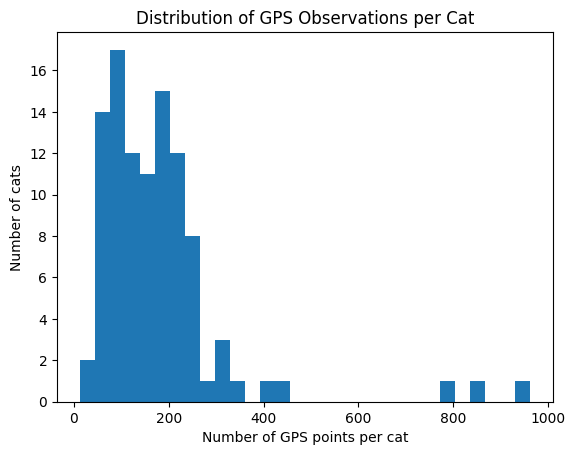

In [ ]:
points_per_cat = cats_uk.groupby("tag_id").size()

plt.figure()
plt.hist(points_per_cat, bins=30)
plt.xlabel("Number of GPS points per cat")
plt.ylabel("Number of cats")
plt.title("Distribution of GPS Observations per Cat")
plt.show()


Insight: The dataset is not a uniform sample of movement behavior but a collection of uneven individual movement histories. There are three cats who are outliers with many more GPS points (>800)

### **2.2 Question: Among cats with similar indoor constraints, are movement behaviors similar, or do they demonstrate similar spatial usage patterns?**

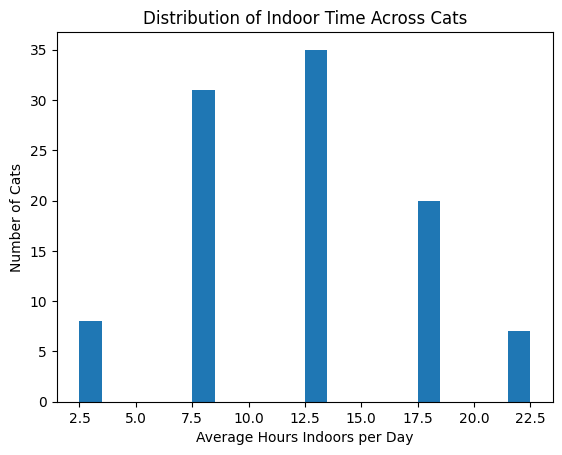

In [ ]:
plt.figure()
plt.hist(cats_uk_ref["hrs_indoors"].dropna(), bins=20)
plt.xlabel("Average Hours Indoors per Day")
plt.ylabel("Number of Cats")
plt.title("Distribution of Indoor Time Across Cats")
plt.show()


Insight: Cats subject to similar constraints exhibit diverse spatial usage patterns and movement styles, suggesting that simple household rules do not fully determine behavioral outcomes

### **2.3 Question: What representations of a cat’s movement history best preserve meaningful behavioral differences while remaining robust to noise and uneven observation counts?**

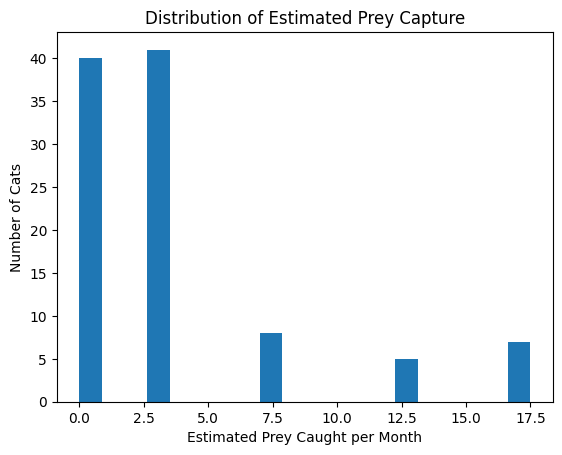

In [ ]:
plt.figure()
plt.hist(cats_uk_ref["prey_p_month"].dropna(), bins=20)
plt.xlabel("Estimated Prey Caught per Month")
plt.ylabel("Number of Cats")
plt.title("Distribution of Estimated Prey Capture")
plt.show()


Insight: Extreme cases (outliers) may dominate ecological consequences.

### **2.4 Question: How much of the observed variation in movement behavior is driven by true behavioral differences versus differences in tracking density across cats?**

/tmp/ipython-input-4114883212.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cats_uk['location_long'], y=cats_uk['location_lat'], cmap='Blues', shade=True)


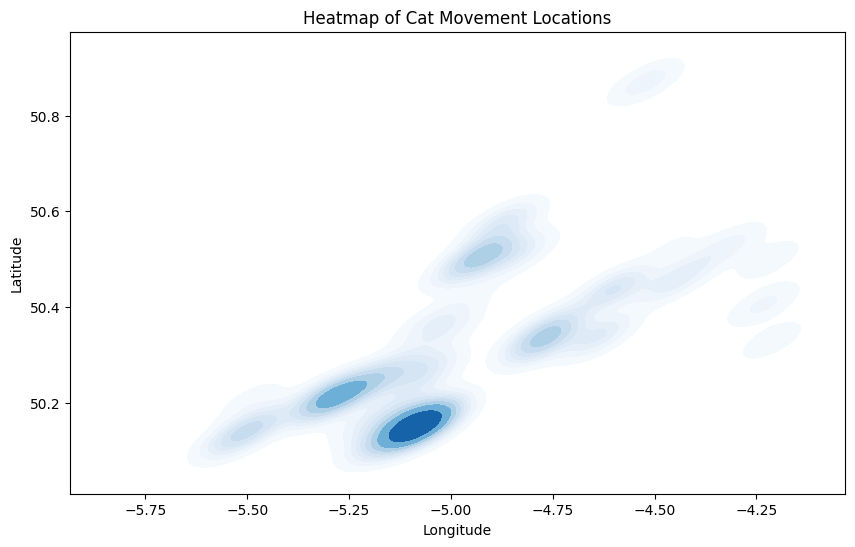

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=cats_uk['location_long'], y=cats_uk['location_lat'], cmap='Blues', shade=True)
plt.title("Heatmap of Cat Movement Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Insight: The heatmap shows where cats spend most of their time, can be used to provide insights in activity concentraion and areas of concern for wildlife.

### **2.5 Question: Which cats have extreme prey-catching behavior(outliers) and how do these cases correlate with specific environmental or behavioral factors?**

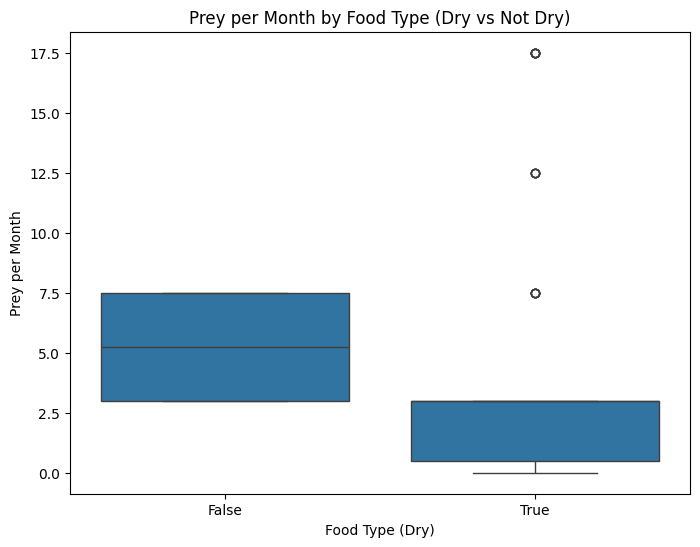

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='food_dry', y='prey_p_month', data=cats_uk_ref)
plt.title("Prey per Month by Food Type (Dry vs Not Dry)")
plt.xlabel("Food Type (Dry)")
plt.ylabel("Prey per Month")
plt.show()


Insight: The boxplot shows cats that are fed dry food tend to catch fewer prey per month, and the spread of prey counts for them are smaller. There are also noticable outliers for those that are fed dry foods, indicating there are some extreme cases for which they catch way more preys than others, possibly due to behavioral  patterns or environmental factors.